# Prompted Bigraph-Builder Demo

In [1]:
from biosimulator_processes.biosimulator_builder import BiosimulatorBuilder, BuildPrompter

CobraProcess registered successfully.
CopasiProcess registered successfully.
SmoldynProcess registered successfully.
TelluriumProcess registered successfully.
DeterministicTimeCourseParameterScan registered successfully.


## The prompter workflow can be described in the following steps:

            1. Initialize the builder to use. We will use BiosimulatorBuilder for this repo.
            2. Initialize the prompter, passing at least the object generated from #1 and number of processes to add to the composite.
            3. The prompt will begin once the object from #2 is instanitated.

### 1. Initialize the builder

In [2]:
biosim_builder = BiosimulatorBuilder()  # TODO: Base OpenAPI spec for REST/swagger on the Builder: Perhaps a generalized Builder REST and BiosimBuilder REST?.
    

#### View the list of available processes (optional).

In [3]:
biosim_builder.list_processes()

['CobraProcess',
 'TelluriumProcess',
 'CopasiProcess',
 'ram-emitter',
 'DeterministicTimeCourseParameterScan',
 'console-emitter',
 'SmoldynProcess']

### 2. & 3. Instantiate the Build Prompter. The idea here is that there is a build prompter that uses references from a given Builder instance/implementation (in this case, BiosimulatorBuilder) to dynamically add registered processes to the bigraph. BuildPrompter exists as one of the classes in the highest-level BigraphBuilder API. Let's add a number of the same copasi processes to the composite as a simple way to start.

In [4]:
num = 1
prompter = BuildPrompter(builder_instance=biosim_builder, num_additions=num)

New prompter instance created!


#### NOTE: Input kwargs can be generated by the prompter via both kwarg and prompt

In [5]:
arnold_poolman_biomodel_id = 'BIOMD0000000391'
hockin_1999 = 'BIOMD0000000365'
process_kwargs = {
    'model': {'model_source': arnold_poolman_biomodel_id}
}

# a=3, b={'d': 34, 'k': 10}
input_kwargs = prompter.generate_input_kwargs() # **process_kwargs

Input kwargs generated: {}


### Start the prompter

Run request initiated...
1 processes will be added to the bi-graph.

All processes will be connected as well.
Key: model, val: {'model_source': 'BIOMD0000000365'}
Key: method, val: 'lsoda'
Input kwargs generated: {'model': {'model_source': 'BIOMD0000000365'}, 'method': 'lsoda'}
copasiA process successfully added to the bi-graph!

All nodes including the most recently added copasiA processes connected!

Done adding single copasiA (CopasiProcess) to the bigraph.

All processes added.
File 'simple_test_3' successfully written in 'out' directory.
Composition written to document!
This is the composite: 


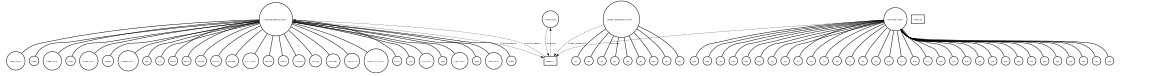

In [6]:
# add processes
prompter.start()

In [8]:
# run composition
duration = None  # we will be prompted if this is passed.
prompter.run(num=num, duration=duration)

Generating composite...
Composite generated!
Running generated composite for an interval of 10
Composite successfully run. Request complete. Done.


### Visualize the process composition

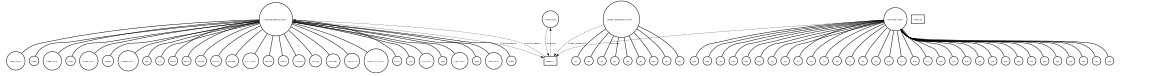

In [9]:
prompter.visualize_bigraph()

In [10]:
prompter.builder_instance

Builder({ 'copasiA': { '_type': 'process',
               'address': 'local:CopasiProcess',
               'config': { 'method': 'lsoda',
                           'model': { 'model_changes': { 'global_parameter_changes': None,
                                                         'reaction_changes': None,
                                                         'species_changes': None},
                                      'model_id': '',
                                      'model_language': 'sbml',
                                      'model_name': 'composite_process_model',
                                      'model_source': 'BIOMD0000000365',
                                      'model_units': None}},
               'inputs': { 'floating_species': ['floating_species_store'],
                           'model_parameters': ['model_parameters_store'],
                           'reactions': ['reactions_store'],
                           'time': ['time_store']},
           

### load a composite from document
This document represents the full state of the composite, and so can reproduce the previous composite when loaded into a fresh Builder

In [ ]:
# b2 = Builder(core=core, file_path='out/toy_bigraph.json')
# b2

In [ ]:
# b2.visualize()